# Orders - Multivariate Regression of  the `review_score`

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import modules 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

⚠️ You are strongly advised to:
* 💾 download the solution for yesterday's optional `distance_seller_customer` function if you didn't have time to code it
* 👥 copy-paste it into your `olist/orders.py` file



👇 First things first, import the `orders` dataset

In [51]:
# YOUR CODE HERE
from olist.order import Order
olist = Olist()
orders = Order().get_training_data()

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,8.436574,15.544063,0.0,delivered,0,0,4,1,1,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,13.782037,19.137766,0.0,delivered,0,0,4,1,1,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,9.394213,26.639711,0.0,delivered,1,0,5,1,1,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,13.208750,26.188819,0.0,delivered,1,0,5,1,1,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,2.873877,12.112049,0.0,delivered,1,0,5,1,1,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...
96356,9c5dedf39a927c1b2549525ed64a053c,8.218009,18.587442,0.0,delivered,1,0,5,1,1,72.00,13.08
96357,63943bddc261676b46f01ca7ac2f7bd8,22.193727,23.459051,0.0,delivered,0,0,4,1,1,174.90,20.10
96358,83c1379a015df1e13d02aae0204711ab,24.859421,30.384225,0.0,delivered,1,0,5,1,1,205.99,65.02
96359,11c177c8e97725db2631073c19f07b62,17.086424,37.105243,0.0,delivered,0,0,2,2,1,359.98,81.18


In [53]:
orders.sample(10)

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value
46217,3dcd400ff4301f079012e668f0c7a320,9.049062,29.186285,0.000000,delivered,0,0,3,1,1,39.99,11.85
37089,125005c942aa889a867518019392d649,2.117755,11.361771,0.000000,delivered,1,0,5,1,1,79.99,8.72
58347,10b4aca7d76f1ff55e0dfc750e4e0016,29.376863,22.604063,6.772801,delivered,0,1,1,1,1,520.00,18.39
64912,f3ace35a38b59892c97c14e9eadbc923,18.916574,30.889653,0.000000,delivered,1,0,5,1,1,45.90,17.63
75487,b9f477fd3f945b7f9c9392fecdafe712,19.800567,27.120984,0.000000,delivered,0,0,3,1,1,122.99,15.61
42983,a16ba3cb9eadcd233262e7dcabd63592,6.824294,22.337072,0.000000,delivered,1,0,5,2,1,59.98,23.70
17161,0f2f8cfaa707ef6df9c6363b3d70ed23,11.938252,25.092512,0.000000,delivered,1,0,5,1,1,19.95,8.72
71609,161df324497b4eb26108b523c74327a5,44.026991,28.580752,15.446238,delivered,0,1,1,1,1,149.90,38.60
7419,497557705ed42b9e7678b808d1f21dbb,11.248762,20.374618,0.000000,delivered,1,0,5,1,1,82.50,33.94
58492,bc488184689ceaa10ede9045693eb6bc,38.334456,26.517153,11.817303,delivered,0,1,1,1,1,1670.00,59.98


Let's recall our simple analysis from yesterday's exercise: 

Based on our correlation matrix down below 👇, we can notice that `review_score` is mostly correlated with  two features : `wait_time` and `delay_vs_expected`. However, these two features are also highly correlated with each other. 

In this exercise, we will use `statsmodels` to distinguish the effect of one feature, **holding the other features constant**.

<AxesSubplot:>

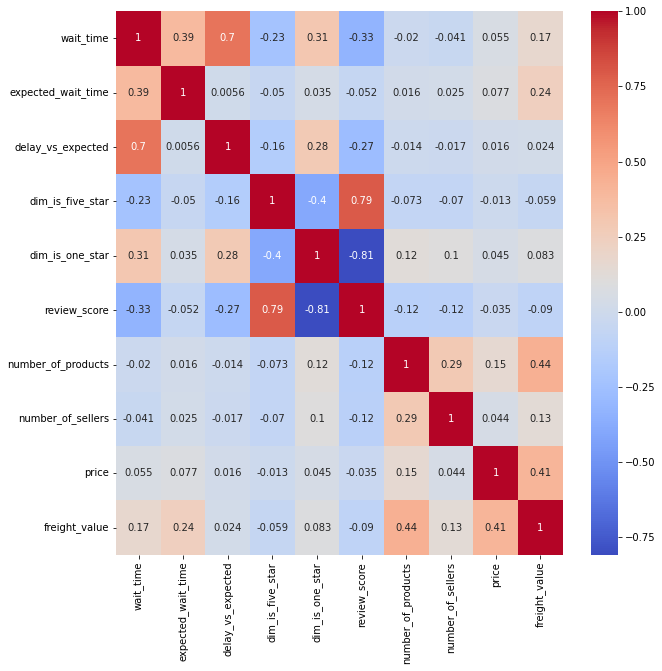

In [31]:
plt.figure(figsize = (10,10))

sns.heatmap(orders.corr(), 
            cmap='coolwarm', 
            annot = True, 
            annot_kws={"size": 10})

📈 Using `seaborn`, plot a `regression line` of the `review_score` vs. the `delay_vs_expected`.

Do it once with a sub-`sample` of the population, and once with the `entire population`.

(0.0, 5.9797759253377185)

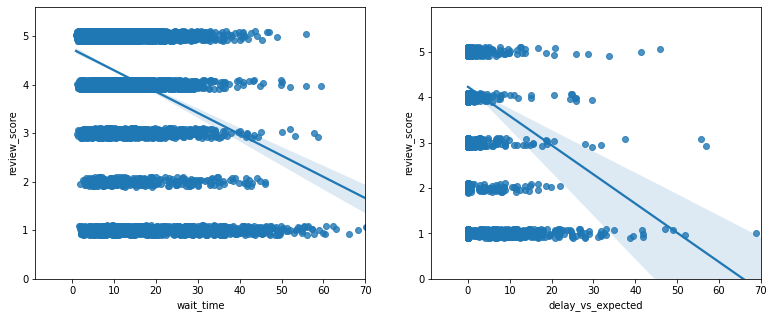

In [32]:
# YOUR CODE HERE
sample = orders.sample(10000, random_state=42)
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
sns.regplot(x = sample.wait_time, y= sample.review_score, y_jitter=.1)
plt.xlim(right=70)
plt.ylim(bottom=0)

plt.subplot(1,2,2)
sns.regplot(x = sample.delay_vs_expected, y= sample.review_score, y_jitter=.1)
plt.xlim(right=70)
plt.ylim(bottom=0)

## 1 - Univariate regression

❓Use [statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html) with `statsmodels.formula.api` to quickly make
 - `model1`: an ols regression of `review_score` over `wait_time`
 - `model2`: an ols regression of `review_score` over `delay_vs_expected`

For each, print the `summary` table and interpret the results:
- Make sure to understand how these results match those of the seaborn regplot
- Read the regression performance metric `R-squared`, as well as `individual regression coefficients`, `t-values`, `p-values`, and `95% confidence intervals`

***Model 1***:

In [39]:
# YOUR CODE HERE
import statsmodels.formula.api as smf

model1 = smf.ols(formula='review_score ~ wait_time', data=orders).fit()
model1.rsquared
model1.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                 1.208e+04
Date:                Wed, 20 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:48:33   Log-Likelihood:            -1.5519e+05
No. Observations:               96353   AIC:                         3.104e+05
Df Residuals:                   96351   BIC:                         3.104e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7236      0.006    729.482      0.000       4.711       4.736
wait_time     -0.0453      0.000   -109.902      0.000      -0.046      -0.045
==============================================================================
Omnibus:                    19639.914   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35586.515
Skew:                          -1.300   Prob(JB):                         0.00
Kurtosis:                       4.449   Cond. No.                         26.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***Model 2***:

In [40]:
# YOUR CODE HERE
model2 = smf.ols(formula='review_score ~ delay_vs_expected', data=orders).fit()
model2.rsquared
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     7715.
Date:                Wed, 20 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:48:37   Log-Likelihood:            -1.5717e+05
No. Observations:               96353   AIC:                         3.143e+05
Df Residuals:                   96351   BIC:                         3.144e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.2124      0.004   1043.898      0.000       4.205       4.220
delay_vs_expected    -0.0751      0.001    -87.836      0.000      -0.077      -0.073
==============================================================================
Omnibus:                    20752.916   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49852.017
Skew:                          -1.204   Prob(JB):                         0.00
Kurtosis:                       5.573   Cond. No.                         4.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2 - Multivariate regression

❓ What is the impact on `review_score` of adding one day of `delay_vs_expected` to the order, **holding `wait_time` constant**? Which of the two features is the most explicative for the low `review_score`?

For that purpose, run an OLS model `model3` where both `wait_time` and `delay_vs_expected` are the features (independent variables), and `review_score` is the target (dependent variable)

***Model 3***:

In [43]:
# YOUR CODE HERE
model3 = smf.ols(formula='review_score ~ delay_vs_expected + wait_time', data=orders).fit()
model3.rsquared
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     6211.
Date:                Wed, 20 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:51:43   Log-Likelihood:            -1.5504e+05
No. Observations:               96353   AIC:                         3.101e+05
Df Residuals:                   96350   BIC:                         3.101e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.6500      0.008    602.765      0.000       4.635       4.665
delay_vs_expected    -0.0206      0.001    -17.485      0.000      -0.023      -0.018
wait_time            -0.0382      0.001    -66.018      0.000      -0.039      -0.037
==============================================================================
Omnibus:                    20080.290   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40618.500
Skew:                          -1.249   Prob(JB):                         0.00
Kurtosis:                       4.970   Cond. No.                         31.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

----
👉 Our multivariate regression allows us to isolate the impact of one feature, while controlling the effect of other features. These new coefficients are called **`partial correlation coefficients`**. 

❓Can you notice the difference with the **simple regression** coeffients computed with *seaborn* above? 

❓What can you say about the relative slopes for `wait_time` and `delay_vs_expected`? 


> YOUR ANSWER HERE
wait time et review score ont une corrélation négative, plus le wait time augmente plus le review score est diminué


<details>
    <summary>- 💡 Solution 💡-</summary>

- Holding `wait_time` constant, each additional day of `delay` reduces the review_score on average by 0.0191 [0.017 - 0.21] points
- Holding `delay` constant, each additional day of `wait_time` reduces the review_score on average by 0.0388 points 

Contrary to what was found with the simple bivariate correlation analysis, `delay` is actually less impactful than `wait_time` in driving lower `review_score`! This interesting finding demonstrates the importance of multi-variate regression to remove the potential impact of confounding factors

---
❌ R-squared is quite low: no more than 12% of the variations of review_score is explained by the combined variations of `wait_time` and `delay_vs_expected`. 

✅ Let's try to add more features to our regression to improve the explainability of the linear regression.

👉 Create a new OLS `model4` with more features from the `orders` dataset.
- ⚠️ Do not create **data leaks**: do not add features that are directly derived from the `review_score`
- ⚠️ Do not add two features perfectly colinear with each other
- ⚖️  Transform each feature $X_i$ into its respective z-score $Z_i = \frac{X_i - \mu_i}{\sigma_i}$ in order to compare the partial regression coefficients $\beta_i$ together. Otherwise, the $\beta_i$ won't be in the same dimension, meaning you'll be comparing apples (e.g. "review_stars per day") with oranges (e.g. "review_stars per BRL")!

📝 <u>Note</u>: a **`Multivariate Linear Regression`** is also called an **`Ordinary Least Squares`** method because in this model, we want to minimise the **`MSE Mean Squared Errors`**

***Model 4***:

In [57]:
model4 = smf.ols(formula='review_score ~ delay_vs_expected + wait_time + price + number_of_sellers+ number_of_products', data=orders).fit()
model4.rsquared
model4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     3148.
Date:                Wed, 20 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:52:59   Log-Likelihood:            -1.2943e+05
No. Observations:               96353   AIC:                         2.589e+05
Df Residuals:                   96347   BIC:                         2.589e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.124e-16      0.003   7.11e-14      1.000      -0.006       0.006
delay_vs_expected     -0.0721      0.004    -17.157      0.000      -0.080      -0.064
wait_time             -0.2894      0.004    -68.718      0.000      -0.298      -0.281
price                  0.0024      0.003      0.797      0.425      -0.004       0.008
number_of_sellers     -0.1008      0.003    -32.287      0.000      -0.107      -0.095
number_of_products    -0.1015      0.003    -32.179      0.000      -0.108      -0.095
==============================================================================
Omnibus:                    18938.773   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38790.207
Skew:                          -1.173   Prob(JB):                         0.00
Kurtosis:                       5.039   Cond. No.                         2.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

57116.550293642256

❓ What features would you like to consider ?

In [47]:
# YOUR CODE HERE
#wait_time + + price + number_of_sellers+ number_of_products

⚖️ Standardize your features.

*Do you remember why we need to perform this operation before running a `Multivariate regression` ?*

<details>
    <summary>- 💡 Answer 💡-</summary>

👉 In a `multivariate linear regression`, we are trying to measure the impact of each feature on the target. 
    
⚠️ Because of scale effects, some features will wrongly be seen as more important than others 
    
    *Ex: if you have a feature "number of bedrooms" from 1 to 5 and a feature "surface" from 20 to 200 sqm, the ranges of these two features are quite different...*

In [58]:
# YOUR CODE HERE
def standardize(x):
    mean = x.mean()
    std = x.std()
    return (x-mean)/std
normalized_orders = orders
columns = ['review_score','wait_time','delay_vs_expected','number_of_sellers','price','number_of_products']
for column in columns:
    normalized_orders[column] = standardize(normalized_orders[column])
normalized_orders.head(5)
model4 = smf.ols(formula = 'review_score ~ delay_vs_expected + wait_time + number_of_sellers + number_of_products + price', data=normalized_orders).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     3148.
Date:                Wed, 20 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:53:07   Log-Likelihood:            -1.2943e+05
No. Observations:               96353   AIC:                         2.589e+05
Df Residuals:                   96347   BIC:                         2.589e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.444e-16      0.003   4.84e-14      1.000      -0.006       0.006
delay_vs_expected     -0.0721      0.004    -17.157      0.000      -0.080      -0.064
wait_time             -0.2894      0.004    -68.718      0.000      -0.298      -0.281
number_of_sellers     -0.1008      0.003    -32.287      0.000      -0.107      -0.095
number_of_products    -0.1015      0.003    -32.179      0.000      -0.108      -0.095
price                  0.0024      0.003      0.797      0.425      -0.004       0.008
==============================================================================
Omnibus:                    18938.773   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38790.207
Skew:                          -1.173   Prob(JB):                         0.00
Kurtosis:                       5.039   Cond. No.                         2.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

👉 Create your `model4` and train it.

In [12]:
# YOUR CODE HERE

---
❓ What are the most important features? (make a bar chart to visualize them well)
- How has the overall regression performance changed?
- Is this regression statistically significant?

In [73]:
model4.params.sort_values()

wait_time            -2.893591e-01
number_of_products   -1.015083e-01
number_of_sellers    -1.008049e-01
delay_vs_expected    -7.208503e-02
Intercept             1.444293e-16
price                 2.415559e-03
dtype: float64

<AxesSubplot:>

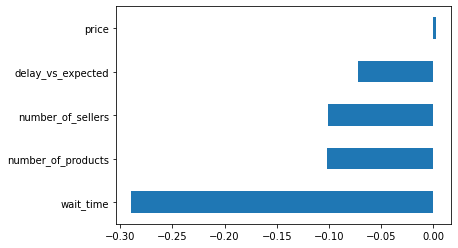

In [77]:
model4.params[1:].sort_values().plot(kind='barh')

In [75]:
# YOUR CODE HERE

<details>
    <summary>- 💡Explanations 💡 -</summary>
    

- `wait_time` is the biggest explanatory variable
- The more `products` and `sellers` there are for a single order, the lower the `review_score` seems to be
- Distance also plays a role in customers' satisfaction.
- Depending on your choice of feature, you may not be able to conclude anything about `price` and `freight_value` if their p-values are too high
    
- Overall, this multivariate regression remains statistically significant, because its F-statistics are much greater than 1 (at least one feature has a very low p-value)

- R-squared hasn't increased by much. Most of the explanability of `review_score` lies outside of the orders dataset.

⚠️ Low R-squared is common when the number of observations (n) is much higher than the number of features (p). Relevant insights can still be derived from such regressions, provided they are statistically significant
</details>



## 3 - Check model performance

⚠️ Regression performance should not be measured only by its R-squared!  

👀 Always visualize the distribution of the predictions, and especially the residuals.

❓ Compute the residuals.

You should see that the mean of the residuals is equal to 0 (always verified in a linear regression context)

In [80]:
# YOUR CODE HERE
prediction = model4.predict()
residuals = prediction - (orders['review_score'])
prediction

array([ 0.17368593,  0.01116508,  0.14589801, ..., -0.3267505 ,
       -0.27673572,  0.1974573 ])

🧮 Compute the associated RMSE. 

In [84]:
# YOUR CODE HERE
#np.power(prediction)


ValueError: invalid number of arguments

📊 Plot the `residuals` in a histogram.

In [85]:
# YOUR CODE HERE
g = g.map(plt.hist,"residuals")
g

NameError: name 'g' is not defined

❓ Can you guess why the residual distplot has such a strange shape? 

*Hint:*<br/>
👉 Plot, on the same graph, both the distribution of the `review_score` and the distribution of the`predicted_review_score`.

In [17]:
# YOUR CODE HERE

☝️ Our model is not so great, for two reasons
- First, because we don't have enough features to explain a significant proportion of the review_scores (low R-squared)
- Second, because we are trying to fit a "linear regression" function to a discrete classification problem

📅 In next session, you will discover a new model: the `Logistic Regression` which, despite its name, is a `Classification Algorithm` 🔥

🏁 Great job! 

💾 Don't forget to *save*, *commit* and *push* this notebook when you are done!